In [43]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

In [44]:
filename = "scale_7.wav"
# Load in audio file
buffer, sample_rate = librosa.load(filename)
print(sample_rate)

22050


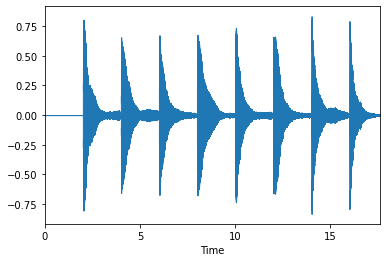

In [45]:
# Construct graph that represents the linear magnitude of audio buffer on time domain
librosa.display.waveplot(buffer, sr=sample_rate)

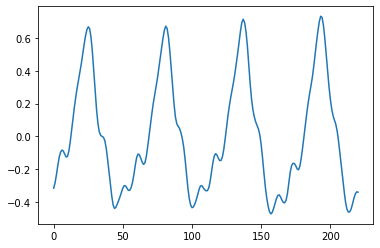

In [46]:
# Construct graphs that visualize smaller ranges of audio buffer
# librosa.display.waveplot(buffer[int(sample_rate*10.04):int(sample_rate*10.05)], sr=sample_rate)
plt.plot(buffer[int(sample_rate*10.04):int(sample_rate*10.05)])

In [62]:
# Transform data into time-frequency-magnitude dimension.
fft_num = 8192

stft_buffer = abs(librosa.stft(buffer, n_fft=fft_num, hop_length=2048))

# Convert magnitude to decibal scale
# db = librosa.amplitude_to_db(np.abs(stft_buffer), ref=np.max)
stft_buffer.shape

# for i in range(stft_buffer.shape[1]):
#     plt.figure()
#     p = stft_buffer[:, i].argmax()
# #     print(p)
#     plt.plot(stft_buffer[:, i])
#     plt.plot(p, stft_buffer[p, i], 'o')

(4097, 190)

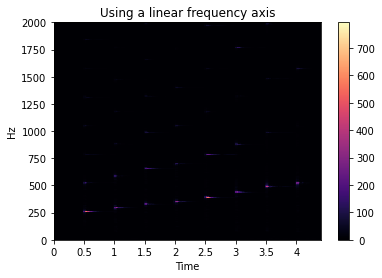

In [63]:
fig, ax = plt.subplots()
img = librosa.display.specshow(stft_buffer, x_axis='time', y_axis='linear', ax=ax)
# ax.set_ylim([1945, 2140]) # C7 range
ax.set_ylim([0, 2000])
ax.set(title='Using a linear frequency axis')
fig.colorbar(img, ax=ax, format="%2.f")

In [64]:
num_freq_bin, num_frame = stft_buffer.shape # The number of frames of the stft data
print(num_freq_bin)
print(num_frame)

4097
190


In [65]:
sample_freq_arr = librosa.fft_frequencies(sr=sample_rate, n_fft=fft_num)
sample_freq_arr

bin_range = sample_freq_arr[1]

bin_range

2.691650390625

In [66]:
p = []

for t in range(0, num_frame):
    max_freq = 0
    max_magnitude = 0
    for f in range(0, num_freq_bin):
        if (max_magnitude < np.abs(stft_buffer[f, t])):
            max_magnitude = np.abs(stft_buffer[f, t])
            max_freq = f
    p.append(max_freq*bin_range)
    print(max_freq)
    print(max_freq*bin_range)
    print(librosa.hz_to_note(max_freq*bin_range))

3315
8922.821044921875
C♯9
3197
8605.206298828125
C9
3283
8836.688232421875
C♯9
3392
9130.078125
D9
3497
9412.701416015625
D9
3497
9412.701416015625
D9
3179
8556.756591796875
C9
3179
8556.756591796875
C9
3281
8831.304931640625
C♯9
3661
9854.132080078125
D♯9
3413
9186.602783203125
D9
3349
9014.337158203125
C♯9
3265
8788.238525390625
C♯9
3171
8535.223388671875
C9
3171
8535.223388671875
C9
3213
8648.272705078125
C♯9
3212
8645.5810546875
C♯9
3288
8850.146484375
C♯9
3697
9951.031494140625
D♯9
3775
10160.980224609375
D♯9
97
261.090087890625
C4
97
261.090087890625
C4
97
261.090087890625
C4
97
261.090087890625
C4
97
261.090087890625
C4
97
261.090087890625
C4
97
261.090087890625
C4
97
261.090087890625
C4
97
261.090087890625
C4
97
261.090087890625
C4
97
261.090087890625
C4
97
261.090087890625
C4
97
261.090087890625
C4
195
524.871826171875
C5
389
1047.052001953125
C6
195
524.871826171875
C5
195
524.871826171875
C5
194
522.18017578125
C5
194
522.18017578125
C5
194
522.18017578125
C5
194
522.180175

(0.0, 2000.0)

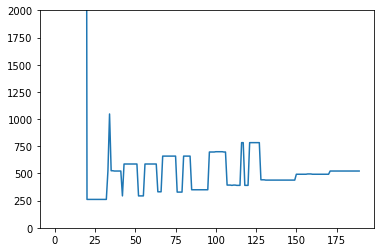

In [67]:
fig, ax = plt.subplots()
plt.plot(p)
ax.set_ylim([0, 2000])

In [68]:
# https://www.audiolabs-erlangen.de/content/05-fau/professor/00-mueller/02-teaching/2016w_mpa/LabCourse_HPSS.pdf
H, P = librosa.decompose.hpss(stft_buffer)
H

array([[2.03649893e-06, 3.67987450e-05, 4.66843048e-05, ...,
        1.58058807e-01, 4.00462225e-02, 8.24256614e-03],
       [8.78718056e-05, 7.01781028e-05, 3.28219285e-05, ...,
        4.32863146e-01, 1.64582357e-01, 4.78877686e-02],
       [1.40132441e-04, 7.41770127e-05, 2.90512962e-05, ...,
        4.37050164e-01, 1.46385956e+00, 1.15873921e+00],
       ...,
       [2.47961026e-07, 2.11901693e-07, 1.46001639e-07, ...,
        4.85810688e-07, 5.74995962e-09, 7.02197467e-10],
       [1.80580784e-07, 9.03388937e-08, 2.09374079e-07, ...,
        5.98711267e-07, 3.93780031e-09, 4.81287343e-10],
       [1.00314395e-07, 1.62029082e-07, 1.41096237e-07, ...,
        3.74912105e-07, 4.05193656e-09, 1.84233212e-10]], dtype=float32)

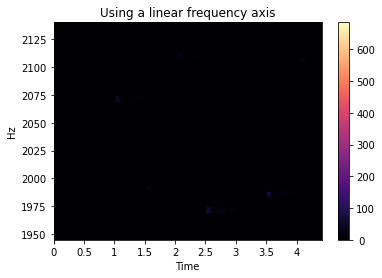

In [69]:
fig, ax = plt.subplots()
img = librosa.display.specshow(H, x_axis='time', y_axis='linear', ax=ax)
ax.set_ylim([1945, 2140]) # C7 range
# ax.set_ylim([0, 1000])
ax.set(title='Using a linear frequency axis')
fig.colorbar(img, ax=ax, format="%2.f")

In [70]:
for t in range(0, num_frame):
    max_freq = 0
    max_magnitude = 0
    for f in range(0, num_freq_bin):
        if (max_magnitude < np.abs(H[f, t])):
            max_magnitude = np.abs(H[f, t])
            max_freq = f
    print(max_freq*bin_range)
    print(librosa.hz_to_note(max_freq*bin_range))

8605.206298828125
C9
8605.206298828125
C9
9170.452880859375
D9
9130.078125
D9
9412.701416015625
D9
9412.701416015625
D9
8556.756591796875
C9
8556.756591796875
C9
8556.756591796875
C9
9154.302978515625
D9
9953.72314453125
D♯9
8408.7158203125
C9
9563.433837890625
D9
8664.422607421875
C♯9
8882.4462890625
C♯9
9011.6455078125
C♯9
8645.5810546875
C♯9
8882.4462890625
C♯9
9951.031494140625
D♯9
10160.980224609375
D♯9
261.090087890625
C4
524.871826171875
C5
524.871826171875
C5
524.871826171875
C5
261.090087890625
C4
261.090087890625
C4
261.090087890625
C4
261.090087890625
C4
261.090087890625
C4
261.090087890625
C4
261.090087890625
C4
261.090087890625
C4
261.090087890625
C4
524.871826171875
C5
1047.052001953125
C6
524.871826171875
C5
524.871826171875
C5
522.18017578125
C5
522.18017578125
C5
522.18017578125
C5
522.18017578125
C5
522.18017578125
C5
586.77978515625
D5
586.77978515625
D5
586.77978515625
D5
586.77978515625
D5
586.77978515625
D5
586.77978515625
D5
586.77978515625
D5
586.77978515625
D5
